# Principal Component Analysis

# -----
-----

## GOAL: Figure out which handwritten digits are most differentiated with PCA.

**Imagine you are working on an image recognition service for a postal service. It would be very useful to be able to read in the digits automatically, even if they are handwritten. (Quick note, this is very much how modern postal services work for a long time now and its actually more accurate than a human). The manager of the postal service wants to know which handwritten numbers are the hardest to tell apart, so he can focus on getting more labeled examples of that data. You will have a dataset of hand written digits (a very famous data set) and you will perform PCA to get better insight into which numbers are easily separable from the rest.**

-----
-----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
digits = pd.read_csv(r'/Users/rahulsharma/Documents/jose+portillia+ml/DATA/digits.csv')

In [3]:
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [4]:
df = digits.drop('number_label',axis=1)

In [5]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
single_image = df.iloc[0]

In [7]:
single_image

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

In [8]:
single_image_array = np.array(single_image)

In [9]:
single_image_array.shape

(64,)

In [10]:
single_image_array_reshaped = single_image_array.reshape(8,8)

In [11]:
single_image_array_reshaped

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

#### Reshape this numpy array into an (8,8) array.

### Use Matplotlib or Seaborn to display the array as an image representation of the number drawn.

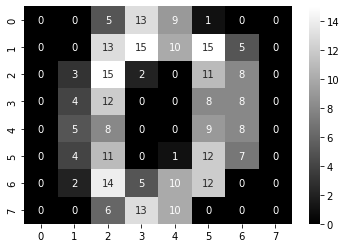

In [12]:
sns.heatmap(single_image_array_reshaped,annot=True,cmap='gray');

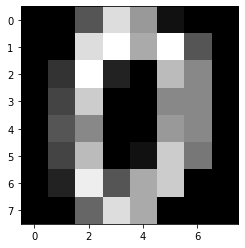

In [13]:
plt.imshow(single_image_array_reshaped,cmap='gray');

### Scaling Data

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaled_pixels = scaler.fit_transform(df)

In [17]:
scaled_pixels

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

### PCA
TASK: Perform PCA on the scaled pixel data set with 2 components.

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca_model = PCA(n_components=2)

In [20]:
pca_pixels = pca_model.fit_transform(scaled_pixels)

In [21]:
pca_model.explained_variance_ratio_

array([0.12033916, 0.09561054])

##### As we can conclude from here that the first pc variance 12% the second performs 9% total = 21%

In [22]:
np.sum(pca_model.explained_variance_ratio_)

0.21594970498078161

### Create a scatterplot of the digits in the 2 dimensional PCA space, color/label based on the original number_label column in the original dataset.

In [23]:
pca_pixels

array([[ 1.91421873, -0.9545123 ],
       [ 0.58898448,  0.92463346],
       [ 1.30203806, -0.31717934],
       ...,
       [ 1.02259975, -0.14791729],
       [ 1.07604954, -0.38088506],
       [-1.25772855, -2.22755801]])

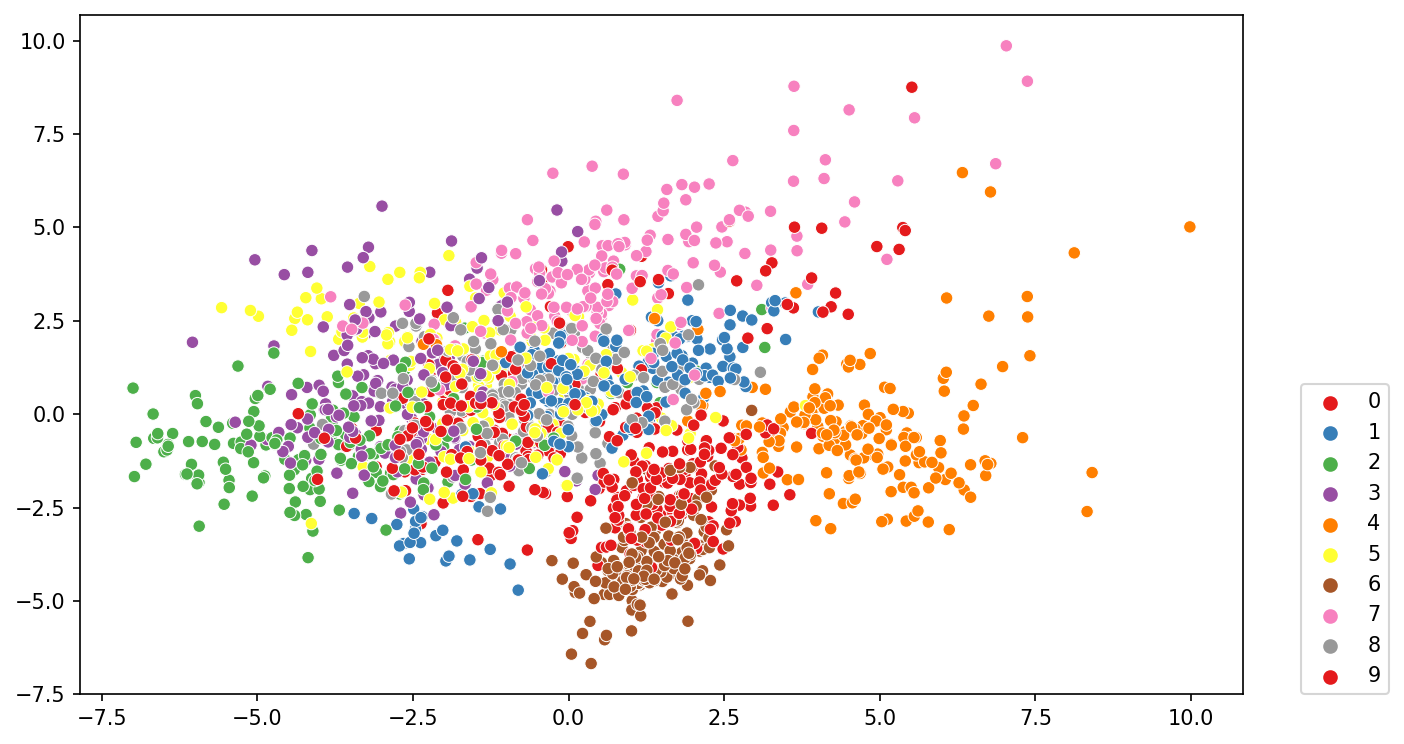

In [24]:
plt.figure(figsize=(10,6),dpi=150)
sns.scatterplot(x=pca_pixels[:,0],y=pca_pixels[:,1],palette='Set1',hue= digits['number_label'].values)
plt.legend(loc=(1.05,0));

#### conclusion:- The numbers which are top of each other in the graph are the numbers like 4, 6, 2 and 7 even though we run the principle component analysis it's hard to differentiate those . Apart from from these number like 0,1,3,5,8 snd 9 t are easy to understand for the machine learning algorithm in future because now, they are easily recognizable.

#### Create an "interactive" 3D plot of the result of PCA with 3 principal components.

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca_model = PCA(n_components=3)

In [27]:
pca_pixels = pca_model.fit_transform(scaled_pixels)

In [28]:
from mpl_toolkits import mplot3d

#### make the 3d image interactive = (%matplotlib notebook)



<IPython.core.display.Javascript object>


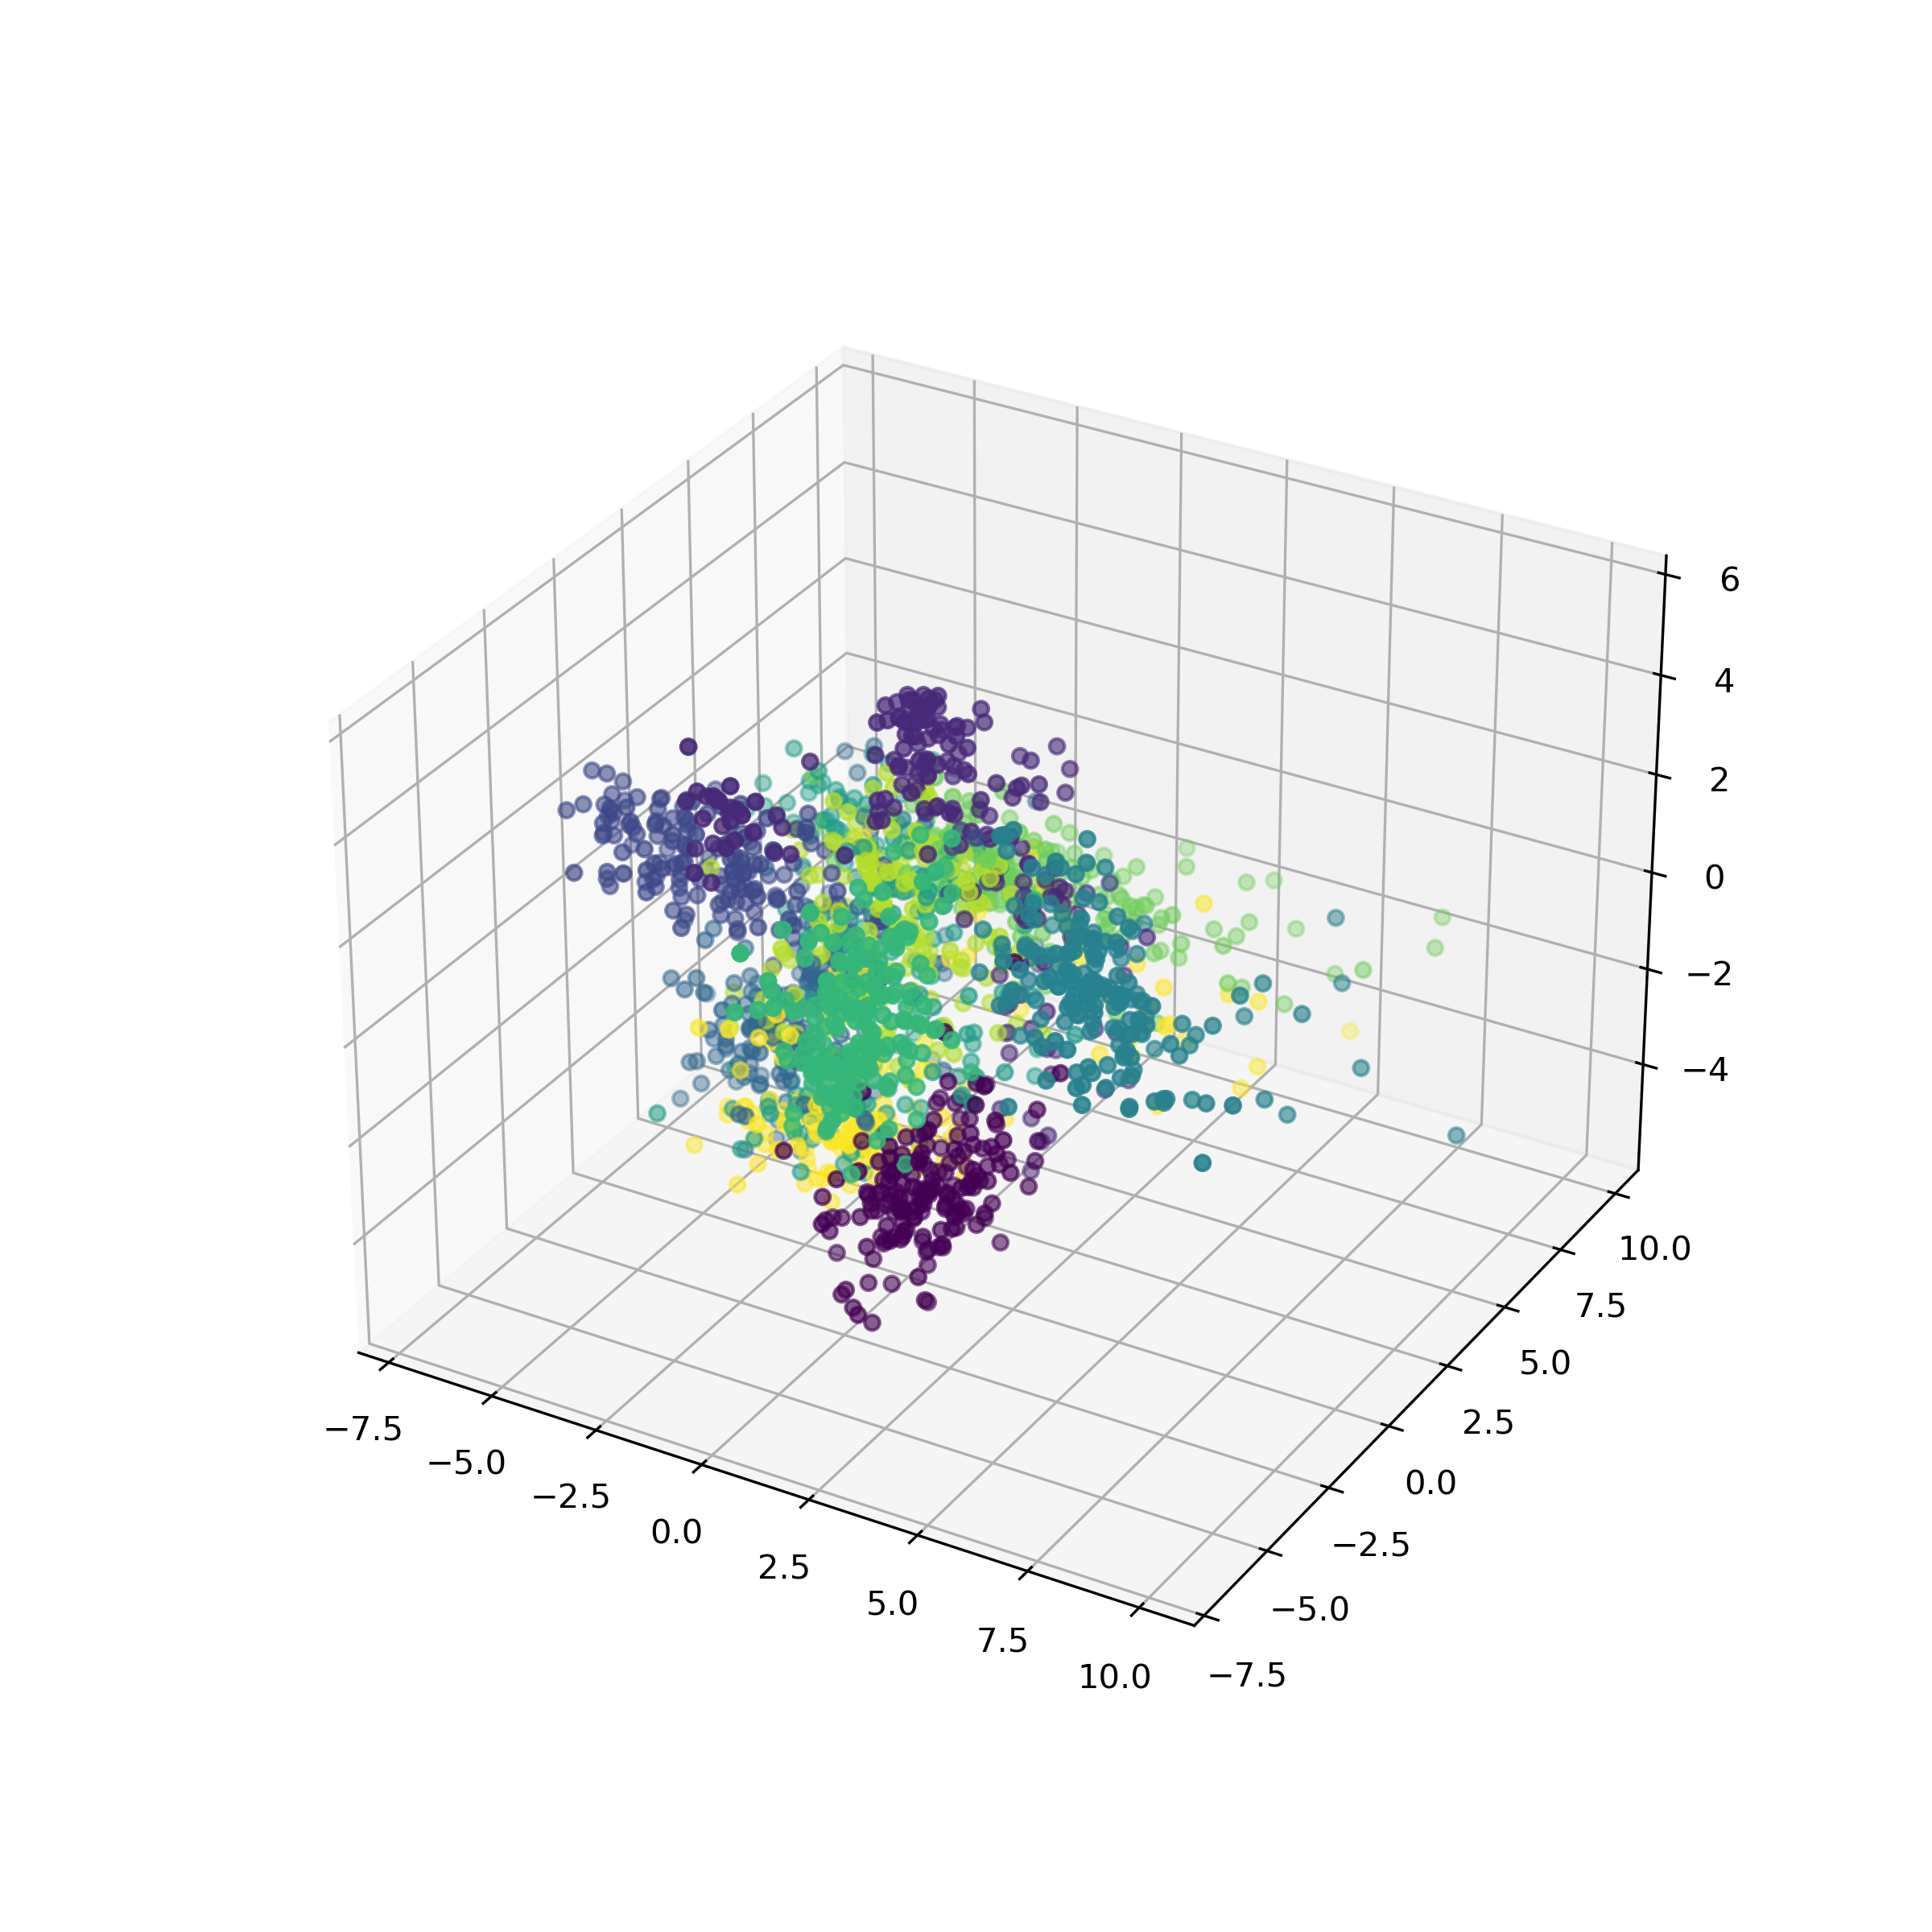

In [31]:
%matplotlib notebook



plt.figure(figsize=(8,8),dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(pca_pixels[:,0],pca_pixels[:,1],pca_pixels[:,2],c=digits['number_label']);